# MATH 795 - Data Science in Math Education

- Plan for the course
- Getting Jupyter / R / R-Studio
- Using Github
- Our Textbook.

## What is Data Science - via an example

What makes data science different from statistics:

- An emphasis on models and making predictions;
- Techniques built around their utility for large amounts of data; and
- Empiracle techniques rather than relying on theories and assumptions.

What do I mean?  

- A major defeciency of classical statistics (or inferential statistics) is that it relies on assumptions that the distribution fits a particular pattern, or covnerges to a particular pattern. The problem is that this is an assumption, and not one that is always easy to justify or observe.

### Testing and Training

If you have enough data, there is another way:  You can divide you data into Testing and Training sets. You use the training set to make a prediction, and then you use the testing set to validate (or reject) the prediction. If you do this over and over, you can get a sense of the extent to which your model is working; you can also use it to determine which set of parameters give your model the best fit. 



### Random Sampling your Data - Resampling

The other technique that becomes viable when you have plenty of data is random sampling your data, called **Resampling**.  **Bootstrapping** is a particular form of this where you build a dataset that is the same size as your original but sampling randomly from your data set with replacement. You can then use this new dataset to compute the test statistic you are interested in. You do this over and over and what you get is a sense of how much the test statistic varies in the samples taken from your population. 

Using resampling you can recreate the idea of Confidence Intervals and Hypothesis tests, but in a way that requires no assumptions about the underlying distribution, just that your datyaset represents a random and representative sample of it. 



# A First Example (which will start but not finish)

A common first example is to examine the Iris Dataset; a collection of measurements for three types of irises assembled by Fisher and published in the late 20s.

In [1]:
iris = read.csv("Datasets/iris.csv", header = FALSE, col.names=c("sepal_length", "sepal_width", "petal_length", "petal_width", "class"))
# header = True (default) is when the first row of the data contains the column names;
# if the header is False then col.names lets us rename the columns (these names were in a separate file)

tail(iris)

sepal_length sepal_width petal_length petal_width class         
145 6.7          3.3         5.7          2.5         Iris-virginica
146 6.7          3.0         5.2          2.3         Iris-virginica
147 6.3          2.5         5.0          1.9         Iris-virginica
148 6.5          3.0         5.2          2.0         Iris-virginica
149 6.2          3.4         5.4          2.3         Iris-virginica
150 5.9          3.0         5.1          1.8         Iris-virginica

In [2]:
library("tidyverse")

# our books uses a set of packages collectively known as "tidyverse"

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.1     ✔ dplyr   1.0.5
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [3]:
install.packages("RColorBrewer")
library("RColorBrewer")

# a package of colorsets that includes ones tailored for colorblindness

Installing package into ‘/home/virgilpierce/R/x86_64-pc-linux-gnu-library/4.0’
(as ‘lib’ is unspecified)



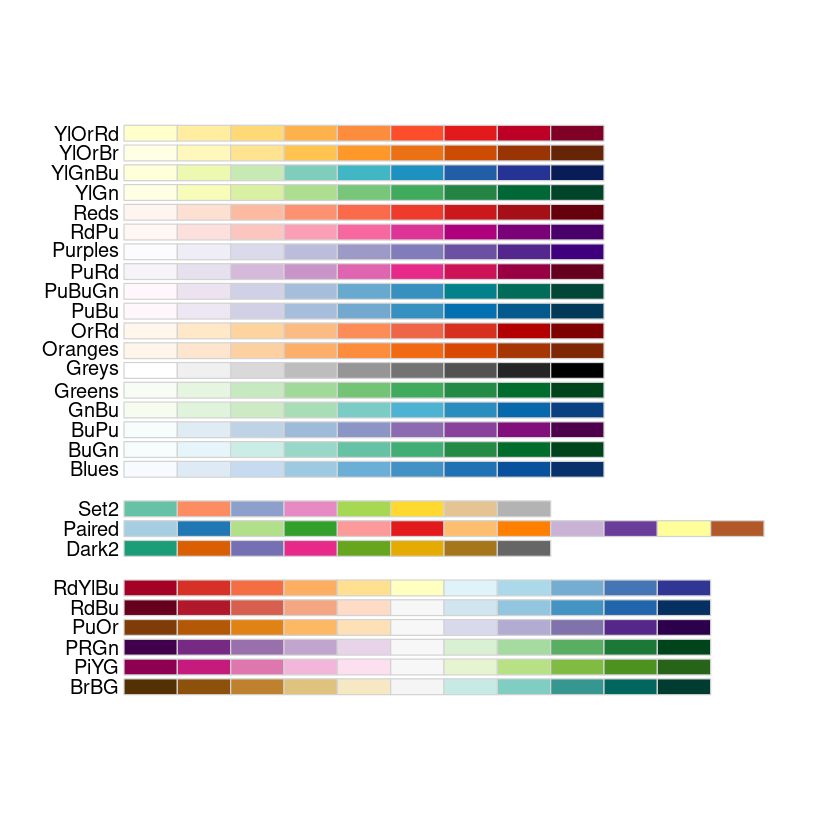

In [4]:
display.brewer.all(colorblindFriendly = TRUE)

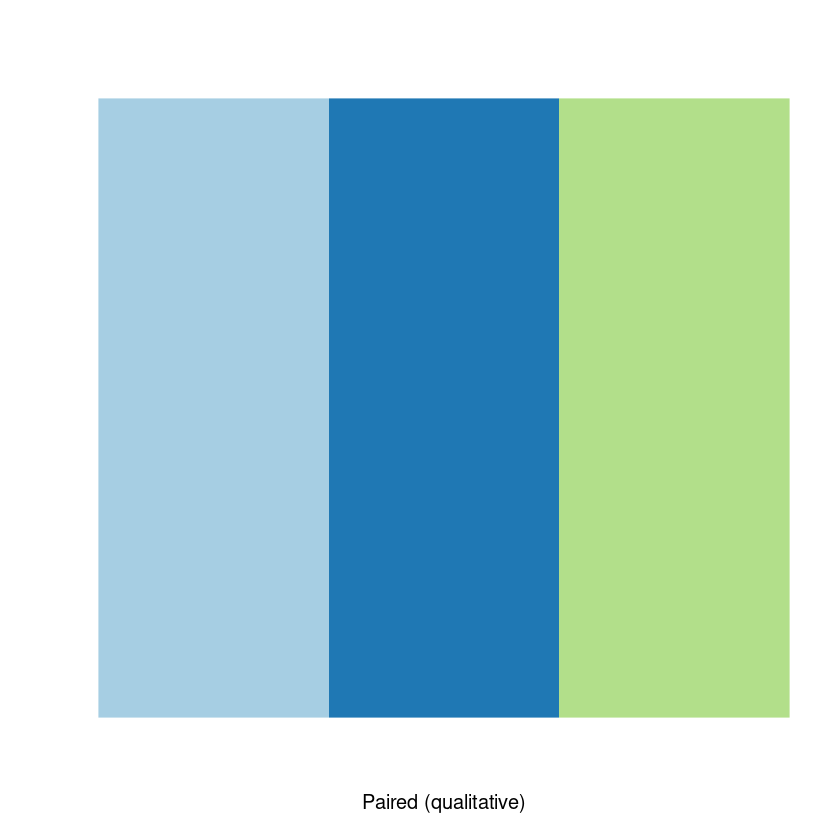

In [5]:
display.brewer.pal(n = 3, name = 'Paired')

In [6]:
brewer.pal(n = 3, name = "Paired")

[1] "#A6CEE3" "#1F78B4" "#B2DF8A"

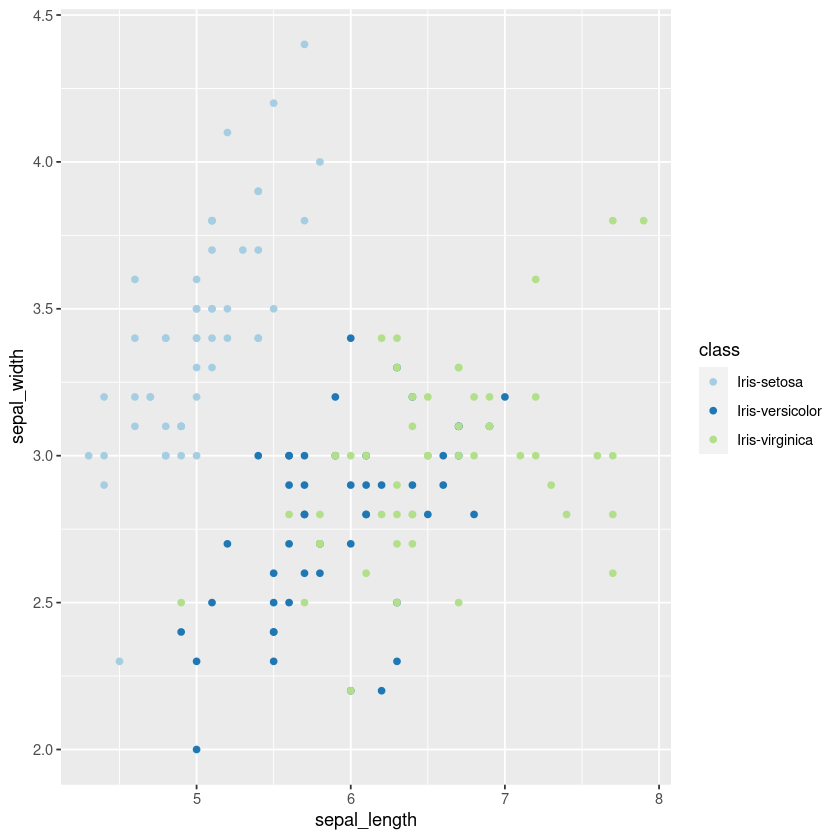

In [7]:
# One thing the tidy verse gives us is a concise grammar for generating graphics

ggplot(data = iris, aes(x=sepal_length, y=sepal_width, col=class)) + geom_point() + 
scale_color_brewer(palette = "Paired")

and now you see the task:  Can we classify the variety of iris using the 4 (or fewer) measurements of the flower dimensions.

We will stop there with this dataset because - It turns out that Fisher had some problematic points of view, and it is worth seeing if we can use a different dataset to do the same introductory task. I mention him so that you are aware of this work, and the dataset as it is one of the classic examples.

A much better alternative is the Penguin Dataset:  https://github.com/allisonhorst/palmerpenguins

In [8]:
penguins = read.csv("Datasets/penguins_lter.csv")
head(penguins)

studyName Sample.Number Species                             Region Island   
1 PAL0708   1             Adelie Penguin (Pygoscelis adeliae) Anvers Torgersen
2 PAL0708   2             Adelie Penguin (Pygoscelis adeliae) Anvers Torgersen
3 PAL0708   3             Adelie Penguin (Pygoscelis adeliae) Anvers Torgersen
4 PAL0708   4             Adelie Penguin (Pygoscelis adeliae) Anvers Torgersen
5 PAL0708   5             Adelie Penguin (Pygoscelis adeliae) Anvers Torgersen
6 PAL0708   6             Adelie Penguin (Pygoscelis adeliae) Anvers Torgersen
  Stage              Individual.ID Clutch.Completion Date.Egg
1 Adult, 1 Egg Stage N1A1          Yes               11/11/07
2 Adult, 1 Egg Stage N1A2          Yes               11/11/07
3 Adult, 1 Egg Stage N2A1          Yes               11/16/07
4 Adult, 1 Egg Stage N2A2          Yes               11/16/07
5 Adult, 1 Egg Stage N3A1          Yes               11/16/07
6 Adult, 1 Egg Stage N3A2          Yes               11/16/07
  Culmen.Length..mm. Culmen.Depth..mm. Flipper.Length..mm. Body.Mass..g. Sex   
1 39.1               18.7              181                 3750          MALE  
2 39.5               17.4              186                 3800          FEMALE
3 40.3               18.0              195                 3250          FEMALE
4   NA                 NA               NA                   NA                
5 36.7               19.3              193                 3450          FEMALE
6 39.3               20.6              190                 3650          MALE  
  Delta.15.N..o.oo. Delta.13.C..o.oo. Comments                      
1      NA                  NA         Not enough blood for isotopes.
2 8.94956           -24.69454                                       
3 8.36821           -25.33302                                       
4      NA                  NA         Adult not sampled.            
5 8.76651           -25.32426                                       
6 8.66496           -25.29805

Warning message:
“Removed 2 rows containing missing values (geom_point).”


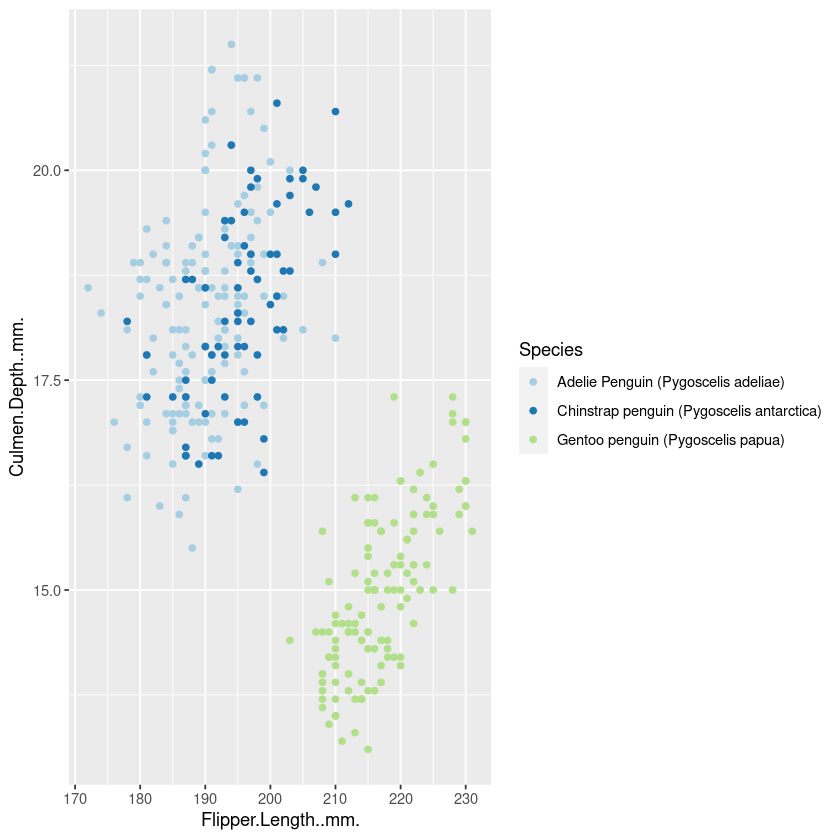

In [9]:
ggplot(data = penguins, aes(x=Flipper.Length..mm., y=Culmen.Depth..mm., col=Species))+geom_point()+
scale_color_brewer(palette = "Paired")

In [10]:
library(repr)

Warning message:
“Removed 2 rows containing missing values (geom_point).”


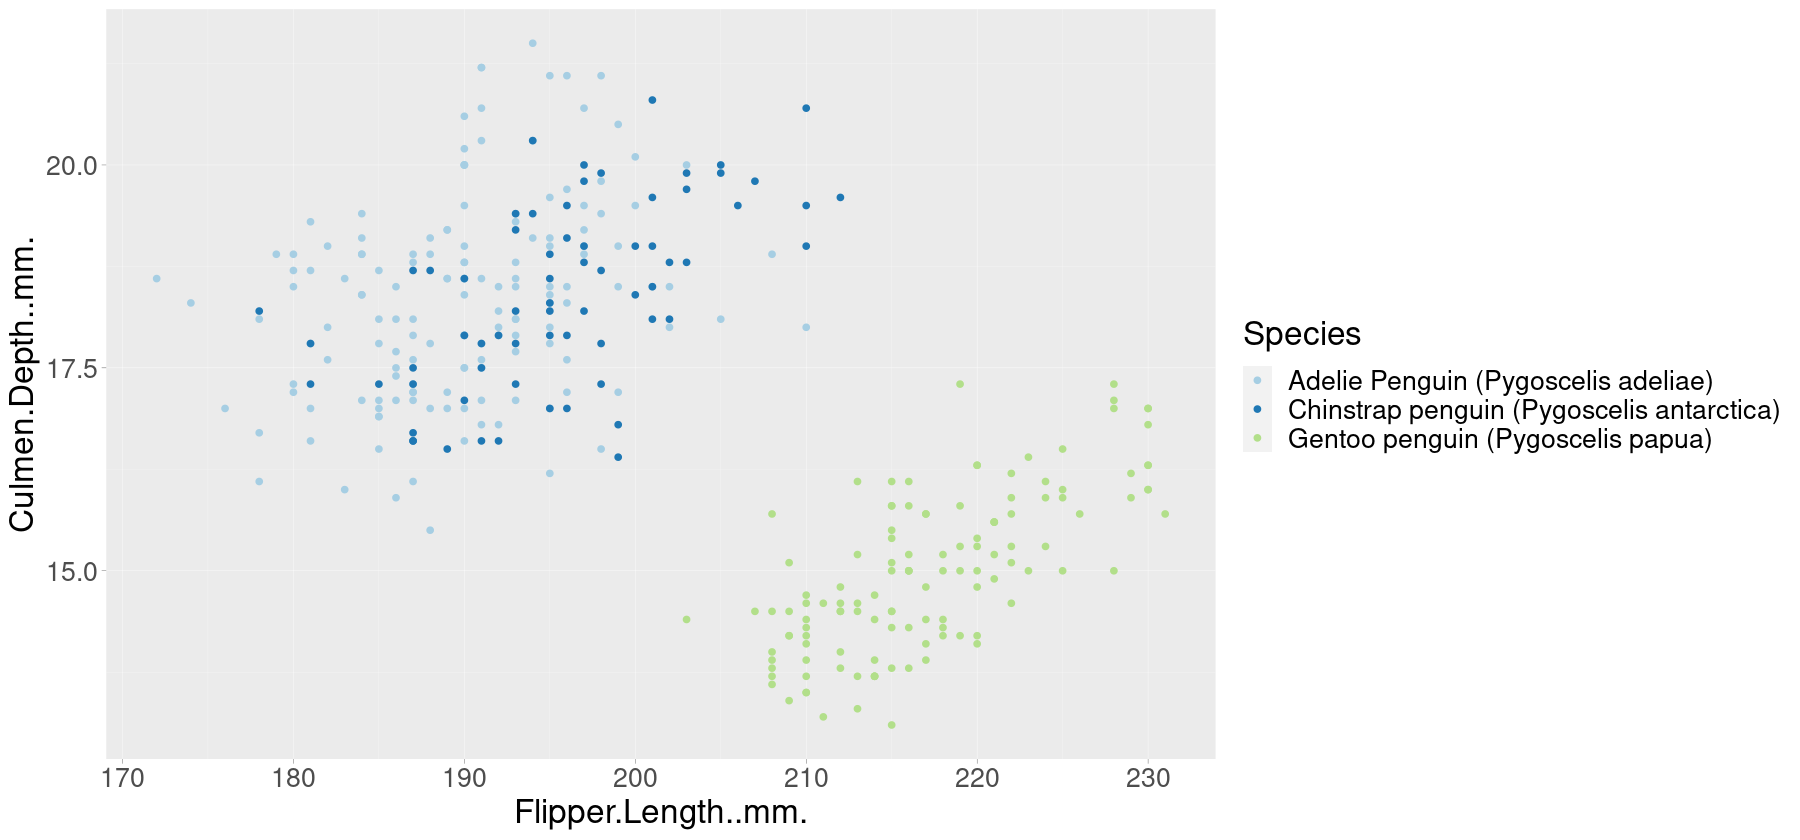

In [11]:
options(repr.plot.width = 15, repr.plot.height = 7)
ggplot(data = penguins, aes(x=Flipper.Length..mm., y=Culmen.Depth..mm., col=Species))+geom_point() +
  theme(text = element_text(size = 20), element_line(size = 0.1))+
scale_color_brewer(palette = "Paired")

### K Nearest Neighbors

To illustrate the idea, what we will do is try to classify the species of Penguin using two (or more) of the numerical values in the data. The model we will use is called K-Nearest Neighbors. We fix an integer for $k$. The model then assigns a point in the space to the class for the majority of the k-nearest neighbors of that point are in. 

For example (see plot).

Of course if we use the whole dataset as the training set we will have no way to check on how well we did. So the trick, noting how many penguins we have data from, is to choose a random sample of them to use as a testing set. We will then train the model on the remaining values and then test its accuracy with the testing set:

In [12]:
# we need to remove the rows with missing data; and also pair the data down to just the values we will use
data = penguins[,c(3, 12,11)]
data = na.omit(data)
head(data)

Species                             Flipper.Length..mm. Culmen.Depth..mm.
1 Adelie Penguin (Pygoscelis adeliae) 181                 18.7             
2 Adelie Penguin (Pygoscelis adeliae) 186                 17.4             
3 Adelie Penguin (Pygoscelis adeliae) 195                 18.0             
5 Adelie Penguin (Pygoscelis adeliae) 193                 19.3             
6 Adelie Penguin (Pygoscelis adeliae) 190                 20.6             
7 Adelie Penguin (Pygoscelis adeliae) 181                 17.8

In [13]:
nrow(data)

[1] 342

In [14]:
help(sample)

sample                  package:base                   R Documentation

_R_a_n_d_o_m _S_a_m_p_l_e_s _a_n_d _P_e_r_m_u_t_a_t_i_o_n_s

_D_e_s_c_r_i_p_t_i_o_n:

     ‘sample’ takes a sample of the specified size from the elements of
     ‘x’ using either with or without replacement.

_U_s_a_g_e:

     sample(x, size, replace = FALSE, prob = NULL)
     
     sample.int(n, size = n, replace = FALSE, prob = NULL,
                useHash = (!replace && is.null(prob) && size <= n/2 && n > 1e7))
     
_A_r_g_u_m_e_n_t_s:

       x: either a vector of one or more elements from which to choose,
          or a positive integer.  See ‘Details.’

       n: a positive number, the number of items to choose from.  See
          ‘Details.’

    size: a non-negative integer giving the number of items to choose.

 replace: should sampling be with replacement?

    prob: a vector of probability weights for obtaining the elements of
          the vector being sampled.

 useHash: ‘logical’ indicating if the hash-version of the algorithm
          should be used.  Can only be used for ‘replace = FALSE’,
          ‘prob = NULL’, and ‘size <= n/2’, and really should be used
          for large ‘n’, as ‘useHash=FALSE’ will use memory
          proportional to ‘n’.

_D_e_t_a_i_l_s:

     If ‘x’ has length 1, is numeric (in the sense of ‘is.numeric’) and
     ‘x >= 1’, sampling _via_ ‘sample’ takes place from ‘1:x’.  _Note_
     that this convenience feature may lead to undesired behaviour when
     ‘x’ is of varying length in calls such as ‘sample(x)’.  See the
     examples.

     Otherwise ‘x’ can be any R object for which ‘length’ and
     subsetting by integers make sense: S3 or S4 methods for these
     operations will be dispatched as appropriate.

     For ‘sample’ the default for ‘size’ is the number of items
     inferred from the first argument, so that ‘sample(x)’ generates a
     random permutation of the elements of ‘x’ (or ‘1:x’).

     It is allowed to ask for ‘size = 0’ samples with ‘n = 0’ or a
     length-zero ‘x’, but otherwise ‘n > 0’ or positive ‘length(x)’ is
     required.

     Non-integer positive numerical values of ‘n’ or ‘x’ will be
     truncated to the next smallest integer, which has to be no larger
     than ‘.Machine$integer.max’.

     The optional ‘prob’ argument can be used to give a vector of
     weights for obtaining the elements of the vector being sampled.
     They need not sum to one, but they should be non-negative and not
     all zero.  If ‘replace’ is true, Walker's alias method (Ripley,
     1987) is used when there are more than 200 reasonably probable
     values: this gives results incompatible with those from R < 2.2.0.

     If ‘replace’ is false, these probabilities are applied
     sequentially, that is the probability of choosing the next item is
     proportional to the weights amongst the remaining items.  The
     number of nonzero weights must be at least ‘size’ in this case.

     ‘sample.int’ is a bare interface in which both ‘n’ and ‘size’ must
     be supplied as integers.

     Argument ‘n’ can be larger than the largest integer of type
     ‘integer’, up to the largest representable integer in type
     ‘double’.  Only uniform sampling is supported.  Two random numbers
     are used to ensure uniform sampling of large integers.

_V_a_l_u_e:

     For ‘sample’ a vector of length ‘size’ with elements drawn from
     either ‘x’ or from the integers ‘1:x’.

     For ‘sample.int’, an integer vector of length ‘size’ with elements
     from ‘1:n’, or a double vector if n >= 2^31.

_R_e_f_e_r_e_n_c_e_s:

     Becker, R. A., Chambers, J. M. and Wilks, A. R. (1988) _The New S
     Language_.  Wadsworth & Brooks/Cole.

     Ripley, B. D. (1987) _Stochastic Simulation_. Wiley.

_S_e_e _A_l_s_o:

     ‘RNGkind(sample.kind = ..)’ about random number generation,
     notably the change of ‘sample()’ results with R version 3

In [15]:
dt = sort(sample(nrow(data), nrow(data)*.8))
# Choose a random set of rows, without repeating, to use as the training set

train=data[dt,]
test=data[-dt,]

In [16]:
# we need to mark the columns we are going to use:
head(train)

Species                             Flipper.Length..mm. Culmen.Depth..mm.
2 Adelie Penguin (Pygoscelis adeliae) 186                 17.4             
5 Adelie Penguin (Pygoscelis adeliae) 193                 19.3             
6 Adelie Penguin (Pygoscelis adeliae) 190                 20.6             
7 Adelie Penguin (Pygoscelis adeliae) 181                 17.8             
8 Adelie Penguin (Pygoscelis adeliae) 195                 19.6             
9 Adelie Penguin (Pygoscelis adeliae) 193                 18.1

In [17]:
library(class)
# The class library contains a suite of classification algorithms

In [18]:
help(knn)

knn                   package:class                    R Documentation

_k-_N_e_a_r_e_s_t _N_e_i_g_h_b_o_u_r _C_l_a_s_s_i_f_i_c_a_t_i_o_n

_D_e_s_c_r_i_p_t_i_o_n:

     k-nearest neighbour classification for test set from training set.
     For each row of the test set, the ‘k’ nearest (in Euclidean
     distance) training set vectors are found, and the classification
     is decided by majority vote, with ties broken at random. If there
     are ties for the ‘k’th nearest vector, all candidates are included
     in the vote.

_U_s_a_g_e:

     knn(train, test, cl, k = 1, l = 0, prob = FALSE, use.all = TRUE)
     
_A_r_g_u_m_e_n_t_s:

   train: matrix or data frame of training set cases.

    test: matrix or data frame of test set cases. A vector will be
          interpreted as a row vector for a single case.

      cl: factor of true classifications of training set

       k: number of neighbours considered.

       l: minimum vote for definite decision, otherwise ‘doubt’. (More
          precisely, less than ‘k-l’ dissenting votes are allowed, even
          if ‘k’ is increased by ties.)

    prob: If this is true, the proportion of the votes for the winning
          class are returned as attribute ‘prob’.

 use.all: controls handling of ties. If true, all distances equal to
          the ‘k’th largest are included. If false, a random selection
          of distances equal to the ‘k’th is chosen to use exactly ‘k’
          neighbours.

_V_a_l_u_e:

     Factor of classifications of test set. ‘doubt’ will be returned as
     ‘NA’.

_R_e_f_e_r_e_n_c_e_s:

     Ripley, B. D. (1996) _Pattern Recognition and Neural Networks._
     Cambridge.

     Venables, W. N. and Ripley, B. D. (2002) _Modern Applied
     Statistics with S._ Fourth edition.  Springer.

_S_e_e _A_l_s_o:

     ‘knn1’, ‘knn.cv’

_E_x_a_m_p_l_e_s:

     train <- rbind(iris3[1:25,,1], iris3[1:25,,2], iris3[1:25,,3])
     test <- rbind(iris3[26:50,,1], iris3[26:50,,2], iris3[26:50,,3])
     cl <- factor(c(rep("s",25), rep("c",25), rep("v",25)))
     knn(train, test, cl, k = 3, prob=TRUE)
     attributes(.Last.value)

In [19]:
pr <- knn(train[,-1],test[,-1],cl=train[,1],k=5)

In [20]:
pr

[1] Adelie Penguin (Pygoscelis adeliae)      
 [2] Chinstrap penguin (Pygoscelis antarctica)
 [3] Adelie Penguin (Pygoscelis adeliae)      
 [4] Adelie Penguin (Pygoscelis adeliae)      
 [5] Adelie Penguin (Pygoscelis adeliae)      
 [6] Adelie Penguin (Pygoscelis adeliae)      
 [7] Chinstrap penguin (Pygoscelis antarctica)
 [8] Adelie Penguin (Pygoscelis adeliae)      
 [9] Adelie Penguin (Pygoscelis adeliae)      
[10] Adelie Penguin (Pygoscelis adeliae)      
[11] Adelie Penguin (Pygoscelis adeliae)      
[12] Adelie Penguin (Pygoscelis adeliae)      
[13] Adelie Penguin (Pygoscelis adeliae)      
[14] Adelie Penguin (Pygoscelis adeliae)      
[15] Adelie Penguin (Pygoscelis adeliae)      
[16] Adelie Penguin (Pygoscelis adeliae)      
[17] Adelie Penguin (Pygoscelis adeliae)      
[18] Adelie Penguin (Pygoscelis adeliae)      
[19] Adelie Penguin (Pygoscelis adeliae)      
[20] Adelie Penguin (Pygoscelis adeliae)      
[21] Adelie Penguin (Pygoscelis adeliae)      
[22] Chinstrap penguin (Pygoscelis antarctica)
[23] Adelie Penguin (Pygoscelis adeliae)      
[24] Adelie Penguin (Pygoscelis adeliae)      
[25] Adelie Penguin (Pygoscelis adeliae)      
[26] Adelie Penguin (Pygoscelis adeliae)      
[27] Adelie Penguin (Pygoscelis adeliae)      
[28] Adelie Penguin (Pygoscelis adeliae)      
[29] Adelie Penguin (Pygoscelis adeliae)      
[30] Adelie Penguin (Pygoscelis adeliae)      
[31] Adelie Penguin (Pygoscelis adeliae)      
[32] Adelie Penguin (Pygoscelis adeliae)      
[33] Chinstrap penguin (Pygoscelis antarctica)
[34] Adelie Penguin (Pygoscelis adeliae)      
[35] Adelie Penguin (Pygoscelis adeliae)      
[36] Adelie Penguin (Pygoscelis adeliae)      
[37] Adelie Penguin (Pygoscelis adeliae)      
[38] Adelie Penguin (Pygoscelis adeliae)      
[39] Adelie Penguin (Pygoscelis adeliae)      
[40] Chinstrap penguin (Pygoscelis antarctica)
[41] Chinstrap penguin (Pygoscelis antarctica)
[42] Adelie Penguin (Pygoscelis adeliae)      
[43] Chinstrap penguin (Pygoscelis antarctica)
[44] Chinstrap penguin (Pygoscelis antarctica)
[45] Gentoo penguin (Pygoscelis papua)        
[46] Gentoo penguin (Pygoscelis papua)        
[47] Gentoo penguin (Pygoscelis papua)        
[48] Gentoo penguin (Pygoscelis papua)        
[49] Gentoo penguin (Pygoscelis papua)        
[50] Gentoo penguin (Pygoscelis papua)        
[51] Gentoo penguin (Pygoscelis papua)        
[52] Gentoo penguin (Pygoscelis papua)        
[53] Gentoo penguin (Pygoscelis papua)        
[54] Gentoo penguin (Pygoscelis papua)        
[55] Gentoo penguin (Pygoscelis papua)        
[56] Gentoo penguin (Pygoscelis papua)        
[57] Gentoo penguin (Pygoscelis papua)        
[58] Gentoo penguin (Pygoscelis papua)        
[59] Gentoo penguin (Pygoscelis papua)        
[60] Gentoo penguin (Pygoscelis papua)        
[61] Gentoo penguin (Pygoscelis papua)        
[62] Adelie Penguin (Pygoscelis adeliae)      
[63] Gentoo penguin (Pygoscelis papua)        
[64] Gentoo penguin (Pygoscelis papua)        
[65] Gentoo penguin (Pygoscelis papua)        
[66] Gentoo penguin (Pygoscelis papua)        
[67] Gentoo penguin (Pygoscelis papua)        
[68] Gentoo penguin (Pygoscelis papua)        
[69] Gentoo penguin (Pygoscelis papua)        
3 Levels: Adelie Penguin (Pygoscelis adeliae) ...

In [21]:
sum(test[,1]!=pr)

[1] 11

In [22]:
length(test[,1])

[1] 69

In [23]:
sum(test[,1]!=pr)/length(test[,1])

[1] 0.1594203

How should we measure how accurate it is?



In [24]:
#create confusion matrix
tab <- table(pr, test[,1])
tab

                                           
pr                                          Adelie Penguin (Pygoscelis adeliae)
  Adelie Penguin (Pygoscelis adeliae)                                        30
  Chinstrap penguin (Pygoscelis antarctica)                                   4
  Gentoo penguin (Pygoscelis papua)                                           0
                                           
pr                                          Chinstrap penguin (Pygoscelis antarctica)
  Adelie Penguin (Pygoscelis adeliae)                                               6
  Chinstrap penguin (Pygoscelis antarctica)                                         4
  Gentoo penguin (Pygoscelis papua)                                                 0
                                           
pr                                          Gentoo penguin (Pygoscelis papua)
  Adelie Penguin (Pygoscelis adeliae)                                       1
  Chinstrap penguin (Pygoscelis antarctica)     

To check on the prediction for every point in the phase space, we need to define a new test set of fake-observations:

In [25]:
x = seq(from = 170, to = 240, by = 0.1)
y = seq(from = 13, to = 22, by = 0.1)

area = c()


for (i in x) {
    for (j in y) {
        area = c(area, c(i, j))
    }
}

area = array(area, c(2, length(x)*length(y)) ) %>% t()


In [26]:
species_pr <- knn(train[,-1],area,cl=train[,1],k=5)

In [27]:
species_pr

[1] Adelie Penguin (Pygoscelis adeliae)      
    [2] Adelie Penguin (Pygoscelis adeliae)      
    [3] Adelie Penguin (Pygoscelis adeliae)      
    [4] Adelie Penguin (Pygoscelis adeliae)      
    [5] Adelie Penguin (Pygoscelis adeliae)      
    [6] Adelie Penguin (Pygoscelis adeliae)      
    [7] Adelie Penguin (Pygoscelis adeliae)      
    [8] Adelie Penguin (Pygoscelis adeliae)      
    [9] Adelie Penguin (Pygoscelis adeliae)      
   [10] Adelie Penguin (Pygoscelis adeliae)      
   [11] Adelie Penguin (Pygoscelis adeliae)      
   [12] Adelie Penguin (Pygoscelis adeliae)      
   [13] Adelie Penguin (Pygoscelis adeliae)      
   [14] Adelie Penguin (Pygoscelis adeliae)      
   [15] Adelie Penguin (Pygoscelis adeliae)      
   [16] Adelie Penguin (Pygoscelis adeliae)      
   [17] Adelie Penguin (Pygoscelis adeliae)      
   [18] Adelie Penguin (Pygoscelis adeliae)      
   [19] Adelie Penguin (Pygoscelis adeliae)      
   [20] Adelie Penguin (Pygoscelis adeliae)      
   [21] Adelie Penguin (Pygoscelis adeliae)      
   [22] Adelie Penguin (Pygoscelis adeliae)      
   [23] Adelie Penguin (Pygoscelis adeliae)      
   [24] Adelie Penguin (Pygoscelis adeliae)      
   [25] Adelie Penguin (Pygoscelis adeliae)      
   [26] Adelie Penguin (Pygoscelis adeliae)      
   [27] Adelie Penguin (Pygoscelis adeliae)      
   [28] Adelie Penguin (Pygoscelis adeliae)      
   [29] Adelie Penguin (Pygoscelis adeliae)      
   [30] Adelie Penguin (Pygoscelis adeliae)      
   [31] Adelie Penguin (Pygoscelis adeliae)      
   [32] Adelie Penguin (Pygoscelis adeliae)      
   [33] Adelie Penguin (Pygoscelis adeliae)      
   [34] Adelie Penguin (Pygoscelis adeliae)      
   [35] Adelie Penguin (Pygoscelis adeliae)      
   [36] Adelie Penguin (Pygoscelis adeliae)      
   [37] Adelie Penguin (Pygoscelis adeliae)      
   [38] Adelie Penguin (Pygoscelis adeliae)      
   [39] Adelie Penguin (Pygoscelis adeliae)      
   [40] Adelie Penguin (Pygoscelis adeliae)      
   [41] Adelie Penguin (Pygoscelis adeliae)      
   [42] Adelie Penguin (Pygoscelis adeliae)      
   [43] Adelie Penguin (Pygoscelis adeliae)      
   [44] Adelie Penguin (Pygoscelis adeliae)      
   [45] Adelie Penguin (Pygoscelis adeliae)      
   [46] Adelie Penguin (Pygoscelis adeliae)      
   [47] Adelie Penguin (Pygoscelis adeliae)      
   [48] Adelie Penguin (Pygoscelis adeliae)      
   [49] Adelie Penguin (Pygoscelis adeliae)      
   [50] Adelie Penguin (Pygoscelis adeliae)      
   [51] Adelie Penguin (Pygoscelis adeliae)      
   [52] Adelie Penguin (Pygoscelis adeliae)      
   [53] Adelie Penguin (Pygoscelis adeliae)      
   [54] Adelie Penguin (Pygoscelis adeliae)      
   [55] Adelie Penguin (Pygoscelis adeliae)      
   [56] Adelie Penguin (Pygoscelis adeliae)      
   [57] Adelie Penguin (Pygoscelis adeliae)      
   [58] Adelie Penguin (Pygoscelis adeliae)      
   [59] Adelie Penguin (Pygoscelis adeliae)      
   [60] Adelie Penguin (Pygoscelis adeliae)      
   [61] Adelie Penguin (Pygoscelis adeliae)      
   [62] Adelie Penguin (Pygoscelis adeliae)      
   [63] Adelie Penguin (Pygoscelis adeliae)      
   [64] Adelie Penguin (Pygoscelis adeliae)      
   [65] Adelie Penguin (Pygoscelis adeliae)      
   [66] Adelie Penguin (Pygoscelis adeliae)      
   [67] Adelie Penguin (Pygoscelis adeliae)      
   [68] Adelie Penguin (Pygoscelis adeliae)      
   [69] Adelie Penguin (Pygoscelis adeliae)      
   [70] Adelie Penguin (Pygoscelis adeliae)      
   [71] Adelie Penguin (Pygoscelis adeliae)      
   [72] Adelie Penguin (Pygoscelis adeliae)      
   [73] Adelie Penguin (Pygoscelis adeliae)      
   [74] Adelie Penguin (Pygoscelis adeliae)      
   [75] Adelie Penguin (Pygoscelis adeliae)      
   [76] Adelie Penguin (Pygoscelis adeliae)      
   [77] Adelie Penguin (Pygoscelis adeliae)      
   [78] Adelie Penguin (Pygoscelis adeliae)      
   [79] Adelie Penguin (Pygoscelis adeliae)      
   [80] Adelie Penguin (Pygoscelis adeliae)      
   [

In [28]:
area_prediction = data.frame(cbind(area, species_pr))
head(area_prediction)

V1  V2   species_pr
1 170 13.0 1         
2 170 13.1 1         
3 170 13.2 1         
4 170 13.3 1         
5 170 13.4 1         
6 170 13.5 1

In [29]:
out = c('Adelie Penguin (Pygoscelis adeliae)','Chinstrap penguin (Pygoscelis antarctica)','Gentoo penguin (Pygoscelis papua)')
input = c(1, 2, 3)

area_prediction$species = transform(area_prediction$species_pr, species = out[match(area_prediction$species_pr, input)])$species

head(area_prediction)

V1  V2   species_pr species                            
1 170 13.0 1          Adelie Penguin (Pygoscelis adeliae)
2 170 13.1 1          Adelie Penguin (Pygoscelis adeliae)
3 170 13.2 1          Adelie Penguin (Pygoscelis adeliae)
4 170 13.3 1          Adelie Penguin (Pygoscelis adeliae)
5 170 13.4 1          Adelie Penguin (Pygoscelis adeliae)
6 170 13.5 1          Adelie Penguin (Pygoscelis adeliae)

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



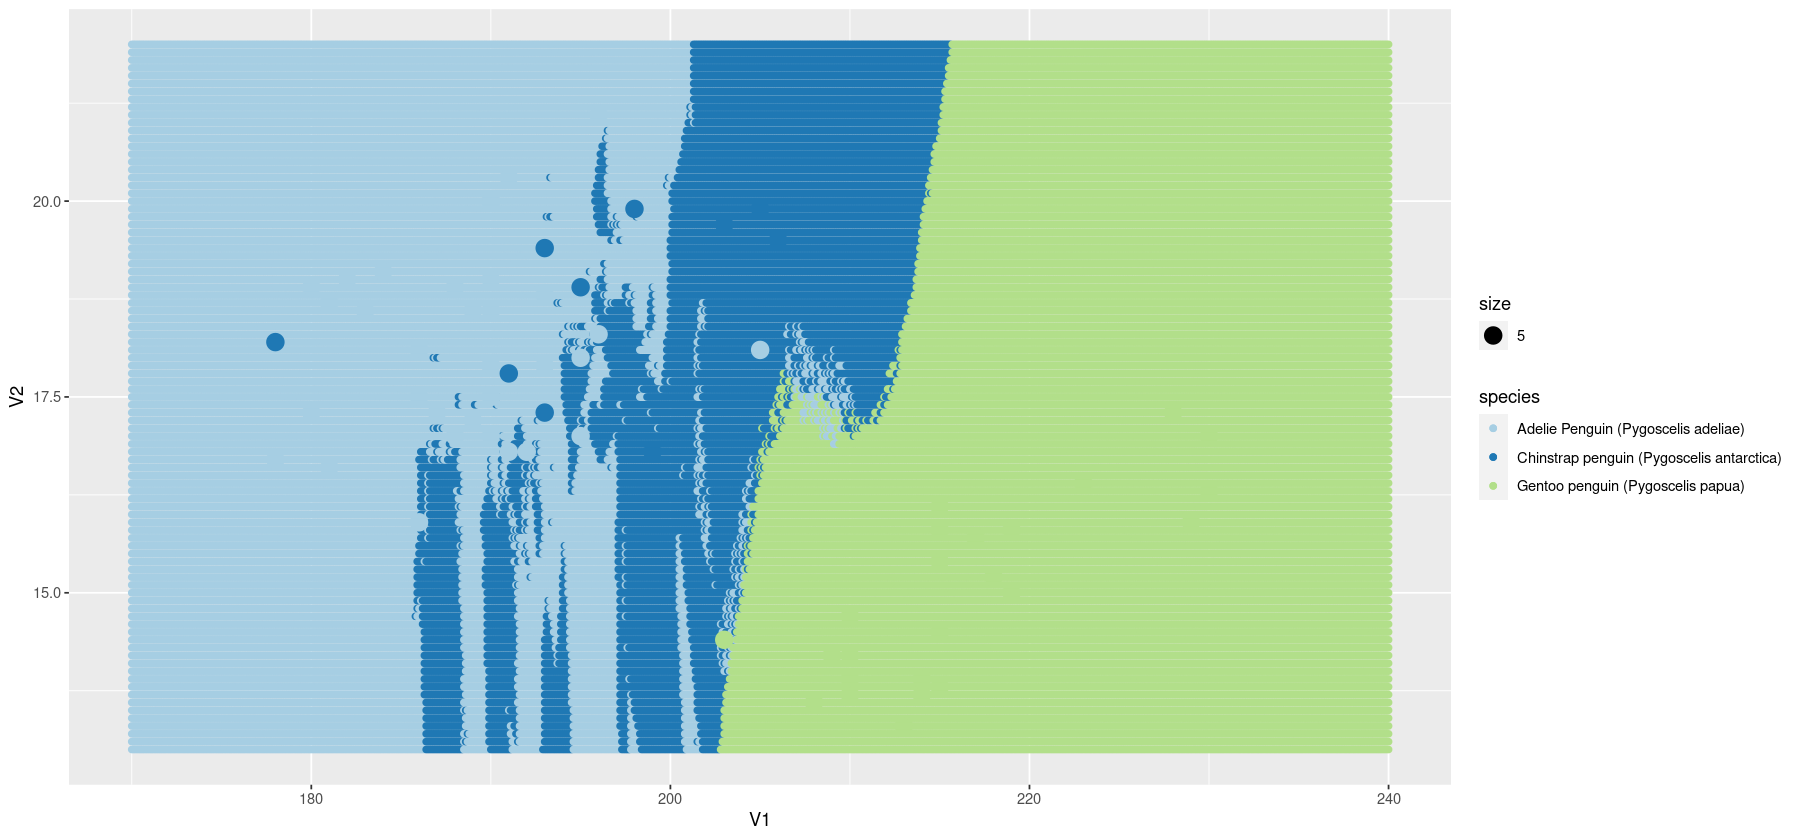

In [30]:
P = ggplot(data = area_prediction, aes(x=V1, y=V2, col=species)) + geom_point() + scale_color_brewer(palette = "Set2")
P + geom_point(data = test, aes(x=Flipper.Length..mm., y=Culmen.Depth..mm., col=Species, size=5)) + scale_color_brewer(palette = "Paired")

# Resampling

In [31]:
gentoo = penguins[penguins[,3]=='Gentoo penguin (Pygoscelis papua)',]
gentoo_flipper = na.omit(gentoo[,12])
# Note I had to add an na.omit

length(gentoo_flipper)

[1] 123

In [32]:
# Let's bootstrap this dataset a bunch of times and compute the mean each time:

data = c()
for (i in 1:50) { 
  temp = sample(gentoo_flipper, 123, replace = TRUE)
  data = c(data, mean(temp))
}

data

[1] 217.2764 216.5528 217.9024 217.0569 217.4959 217.4228 217.8130 217.3008
 [9] 216.9593 216.8130 216.6748 216.7317 217.3008 217.2927 217.6098 217.1220
[17] 216.0894 217.6504 217.0569 217.6667 217.9675 217.1057 217.6748 217.2114
[25] 217.4715 217.2114 217.4553 218.1707 217.4146 217.5203 218.0732 216.5041
[33] 218.0000 217.7480 217.2846 217.7642 216.7886 216.6585 216.0894 217.4715
[41] 217.8780 217.4634 216.8537 216.2520 217.5610 216.8537 217.5366 216.4715
[49] 216.3740 217.0732

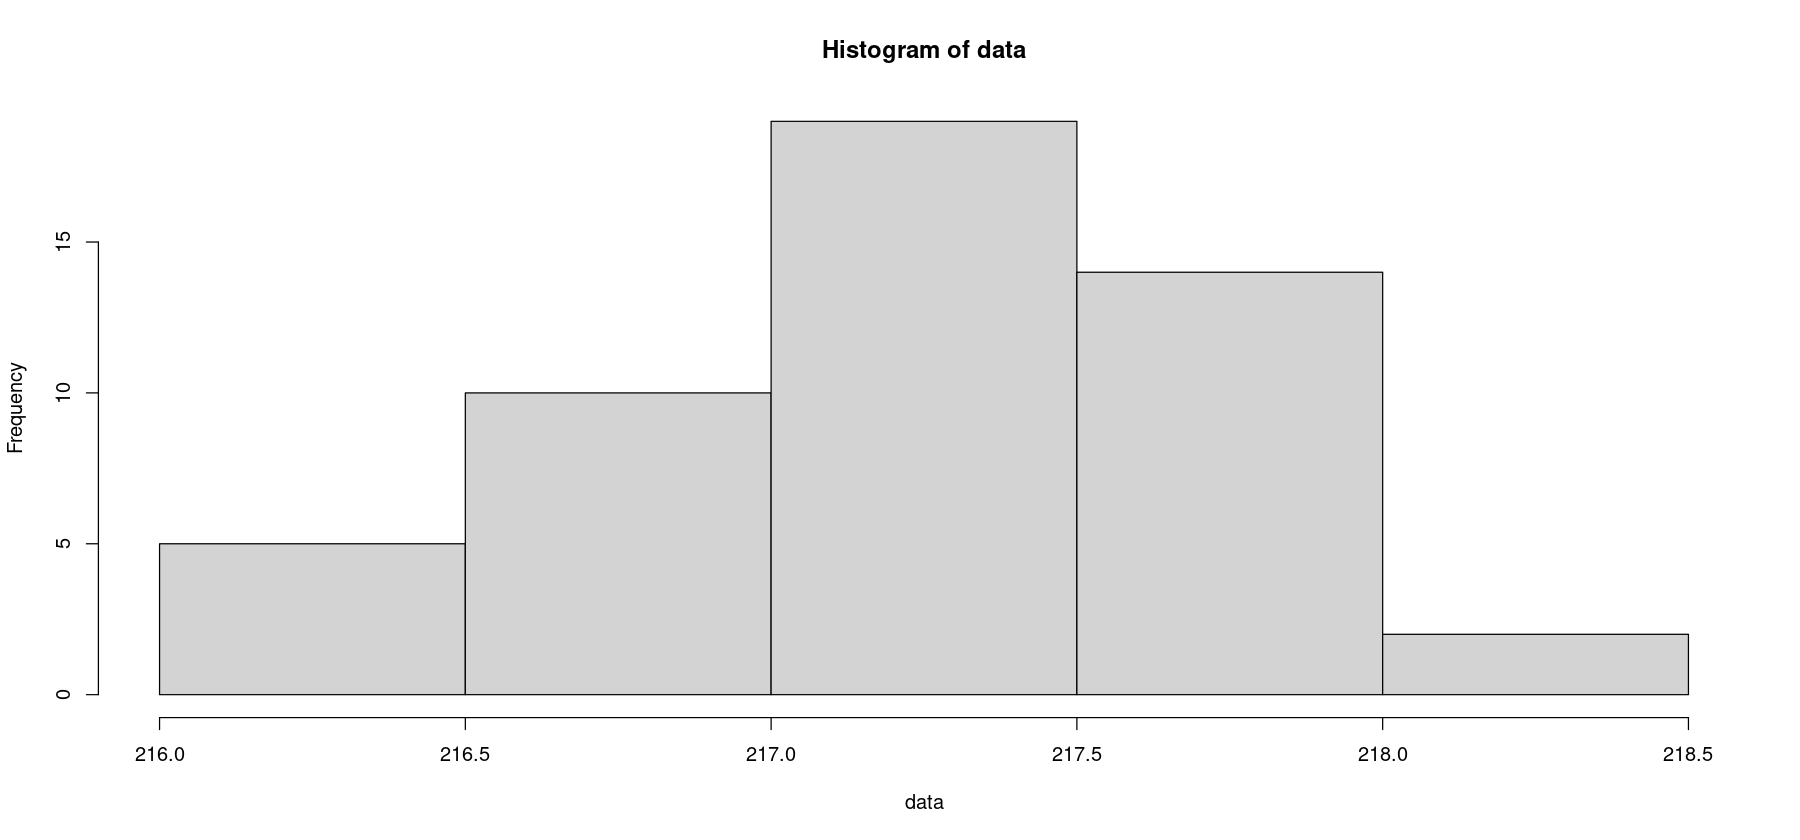

In [33]:
hist(data)

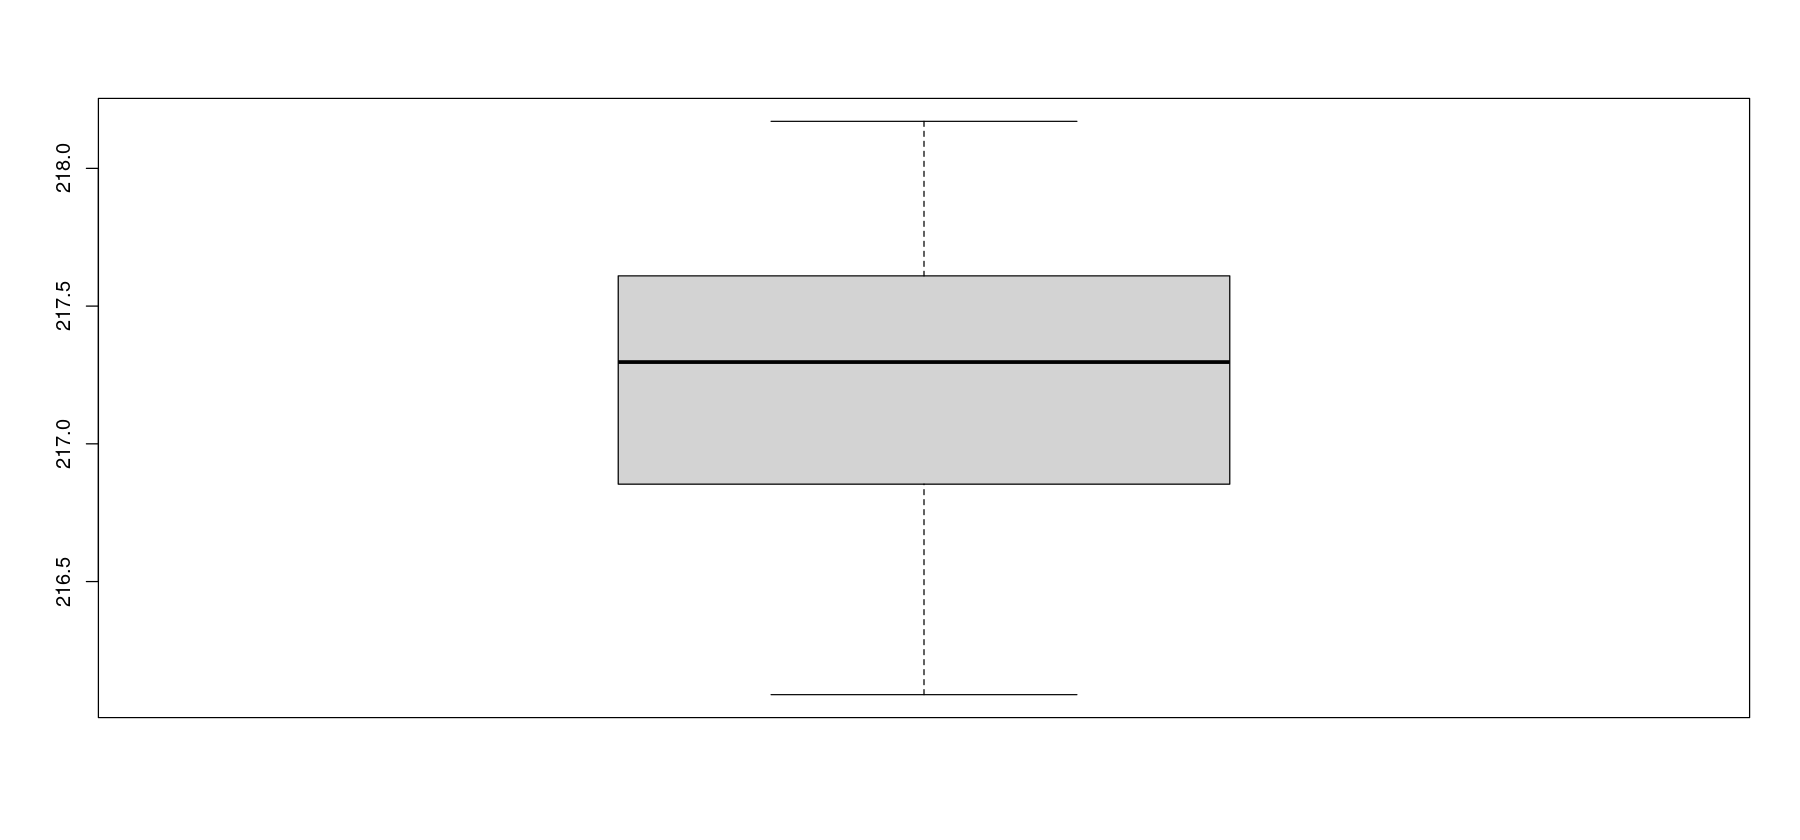

In [34]:
boxplot(data)

# Homework

For next week:

1. Connfirm that your R installation has the tidyverse and RColorBrewer packages, and install them if they do not.

2. Read (or skim) the chapters in our book up to the first Walkthrough.
